In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import bootcampviztools as b

# 1 - CARGA Y TRATAMIENTO DE DATOS

## 1.1 - Carga y tratamiento datos en OVERTAKES

### a) Carga del archivo

In [2]:
df_overtakes = pd.read_csv("./data/overtakes.csv")

### b) En el los datos se aprecia que hay mas número de carreras por temporada que las que en realidad se disputaron.

Tras analizar más detenidamente los datos, se ve como tambien se han tenido en cuenta las carreras al Sprint, un nuevo formato que desde 2021 introduce una carrera adicional el sabado, con una distancia de 1/3 respecto a la carrera del domingo.   
Mediante el bucle for se han borrado esas filas, pues no se podria comparar con el resto de temporadas donde no habian este tipo de carreras.





Update: Durante el trasnscurso del analisis he encontrado un fallo en en DF Overtakes, pues una de las carreas clasificaas como Sprint tenia solo asignado una "S" en vez de la palbara "Sprint".   
He tenido que volver al principio para modificar este dato y asi tener un df sin fallos.

In [3]:
df_overtakes

,Season,Race,Overtakes,TV,Percentage
0,1984,Brazil,61,14,22.95
1,1984,South Africa,83,15,18.07
2,1984,Belgium,50,14,28.00
3,1984,San Marino,53,5,9.43
4,1984,France,54,15,27.78
...,...,...,...,...,...
775,2024,Canada,48,22,45.83
776,2024,Spain,55,34,61.82
777,2024,Austria Sprint,8,6,75.00
778,2024,Austria,46,24,52.17


In [4]:
filtro_2022_Sprint = df_overtakes[df_overtakes["Race"] == "Emilia-Romagna S"].index
df_overtakes.drop(filtro_2022_Sprint, inplace=True)

In [5]:
for race in df_overtakes["Race"]:
    if "Sprint" in race:
        filtro = df_overtakes[df_overtakes.Race == race].index
        df_overtakes.drop(filtro, inplace=True)
     
df_overtakes
        

,Season,Race,Overtakes,TV,Percentage
0,1984,Brazil,61,14,22.95
1,1984,South Africa,83,15,18.07
2,1984,Belgium,50,14,28.00
3,1984,San Marino,53,5,9.43
4,1984,France,54,15,27.78
...,...,...,...,...,...
774,2024,Monaco,4,4,100.00
775,2024,Canada,48,22,45.83
776,2024,Spain,55,34,61.82
778,2024,Austria,46,24,52.17


### c) Se borra tambien la temporada 2024, pues solo tiene la mitad de los datos al no haber finalizado esta.

In [6]:
df_overtakes.drop(df_overtakes[df_overtakes.Season == 2024].index, inplace = True)

### d) Borrado de filas con el valor Season en la columna "Race", pues es la suma de todos los adelantamientos por temporada.

In [7]:
filtro_less_Season = df_overtakes[df_overtakes.Race == "Season"].index
df_overtakes = df_overtakes.drop(filtro_less_Season)
df_overtakes.head(20)

,Season,Race,Overtakes,TV,Percentage
0,1984,Brazil,61,14,22.95
1,1984,South Africa,83,15,18.07
2,1984,Belgium,50,14,28.00
3,1984,San Marino,53,5,9.43
4,1984,France,54,15,27.78
5,1984,Monaco,22,5,22.73
6,1984,Canada,57,5,8.77
7,1984,Detroit,41,3,7.32
8,1984,Dallas,45,6,13.33
9,1984,Great Britain,16,0,0.00


### e) Creacion de columna "GP_num" y bucle for para extraccion de valor de "round" por Gran Premio y Temporada

Tras analizar la tabla "Races", una buena manera de linkar la tabla de adelantamientos es con el numero de gran premio de cada temporada.   
Actualmente la tabla adelantamientos no tiene este valor, pero si que esta ordenada de manera descendete segun ocurrio el Gran Premio.   
Esto nos permite crear un bucle for que recorra el df_overtakes bloqueado por temporada y nos devuelva una lista con el numero del gran premio que fue.   
Cuando se acaba una temporada, el bucle salta a la siguiente y nos devuelve finalmente una lista odenada de valores.      
Estos valores son agregados a nueva columna creada ("GP_num") para poder tener ya asignado el valor de round (como en "Races") a cada fila del df_overtakes.

In [8]:
df_overtakes["GP_num"] = 0
list_Season = df_overtakes.Season.unique()
list_round = []
for season in list_Season:
    for round,r in enumerate(df_overtakes.loc[df_overtakes.Season == season]["Race"]):
        list_round.append(round+1)
   
df_overtakes["GP_num"] = list_round

In [9]:
df_overtakes

,Season,Race,Overtakes,TV,Percentage,GP_num
0,1984,Brazil,61,14,22.95,1
1,1984,South Africa,83,15,18.07,2
2,1984,Belgium,50,14,28.00,3
3,1984,San Marino,53,5,9.43,4
4,1984,France,54,15,27.78,5
...,...,...,...,...,...,...
758,2023,USA,47,28,59.57,18
759,2023,Mexico,48,29,60.42,19
761,2023,Brazil,25,18,72.00,20
762,2023,Las Vegas,99,54,54.55,21


# 1.2 - Carga y tratamiento datos en OVERTAKES AVERAGE

### a) Carga del archivo

In [10]:
df_overtakes_average = pd.read_csv("./data/overtaking_season_averages.csv")

In [11]:
df_overtakes_average.head(5)

,Season,Overtakes,Overtakes on TV,No. of Races,Average,Average on TV,Median,Median on TV
0,1984,781,113,16,48.8,7.1,50.0,5.5
1,1985,742,102,16,46.4,6.4,48.0,6.0
2,1986,658,107,16,41.1,6.7,35.0,6.0
3,1987,592,97,16,37.0,6.1,37.0,5.0
4,1988,531,108,16,33.2,6.8,34.0,6.5


### b) Se crea columna "Percent_on_TV"

In [12]:
df_overtakes_average["Percent on TV"] = (df_overtakes_average["Average on TV"]/df_overtakes_average["Average"])*100
df_overtakes_average.head(3)

,Season,Overtakes,Overtakes on TV,No. of Races,Average,Average on TV,Median,Median on TV,Percent on TV
0,1984,781,113,16,48.8,7.1,50.0,5.5,14.549180
1,1985,742,102,16,46.4,6.4,48.0,6.0,13.793103
2,1986,658,107,16,41.1,6.7,35.0,6.0,16.301703


# 2 - ANÁLISIS 

## 2.1 - Adelantamientos absolutos por temporada

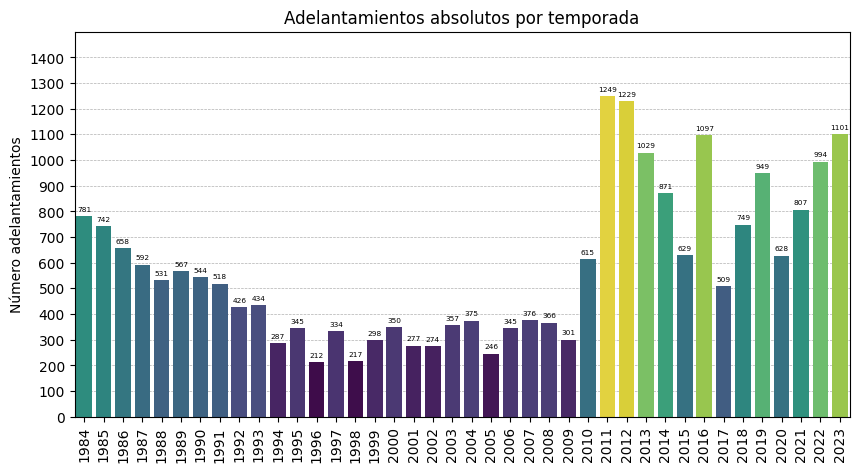

In [13]:
fig, axs = plt.subplots(nrows=1,ncols=1,figsize=(10,5))

axes = sns.barplot(df_overtakes_average, x="Season", y="Overtakes",hue="Overtakes", legend=False, palette="viridis",ax=axs)
axs.tick_params(axis="x", labelrotation=90)
axs.set_ylabel("Número adelantamientos")
axs.set_ylim(0,1500)
plt.yticks(range (0,1500,100))
plt.grid(axis="y", linestyle = "dashed", linewidth = 0.5)
axs.set_axisbelow(True)
axs.set_title("Adelantamientos absolutos por temporada")
axs.set_xlabel("");

for p in axs.patches:
    height = int(p.get_height())
    if height > 10:  # Solo mostrar si el valor es mayor a 10
        axs.annotate(height, (p.get_x() + p.get_width() / 2., height), 
                     ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize= 5.3)
                    
plt.savefig("./img/2_Overtakes/Over_1.png")           

## 2.2 - Media adelantamientos por temporada

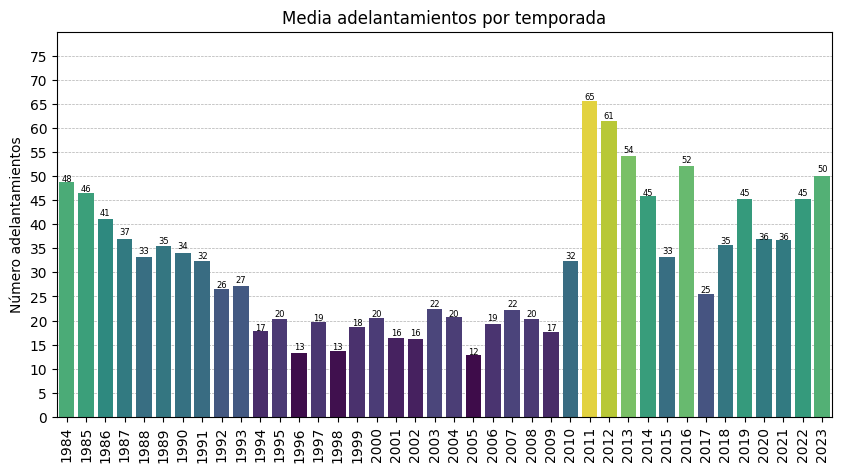

In [14]:
fig, axs = plt.subplots(nrows=1,ncols=1,figsize=(10,5))

axes = sns.barplot(df_overtakes_average, x="Season", y="Average",hue="Average", legend=False, palette="viridis",ax=axs)
axs.tick_params(axis="x", labelrotation=90)
axs.set_ylabel("Número adelantamientos")
axs.set_ylim(0,80)
plt.yticks(range (0,80,5))
plt.grid(axis="y", linestyle = "dashed", linewidth = 0.5)
axs.set_axisbelow(True)
axs.set_title("Media adelantamientos por temporada")
axs.set_xlabel("");

for p in axs.patches:
    height = int(p.get_height())
    if height > 10:  # Solo mostrar si el valor es mayor a 10
        axs.annotate(height, (p.get_x() + p.get_width() / 2., height), 
                     ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize= 6)

plt.savefig("./img/2_Overtakes/Over_2.png") 

## Calculo mediana, media y rango

In [15]:
stats = df_overtakes.groupby('Season')['Overtakes'].agg(
    Rango=lambda x: x.max() - x.min(),
    Media='mean',
    Mediana='median'
).reset_index()


stats.columns = ['Season', 'Rango', 'Media', 'Mediana']


stats.head(3)

,Season,Rango,Media,Mediana
0,1984,67,48.8125,50.0
1,1985,50,46.3750,47.5
2,1986,50,41.1250,34.5


## Gráfico mediana, media y rango

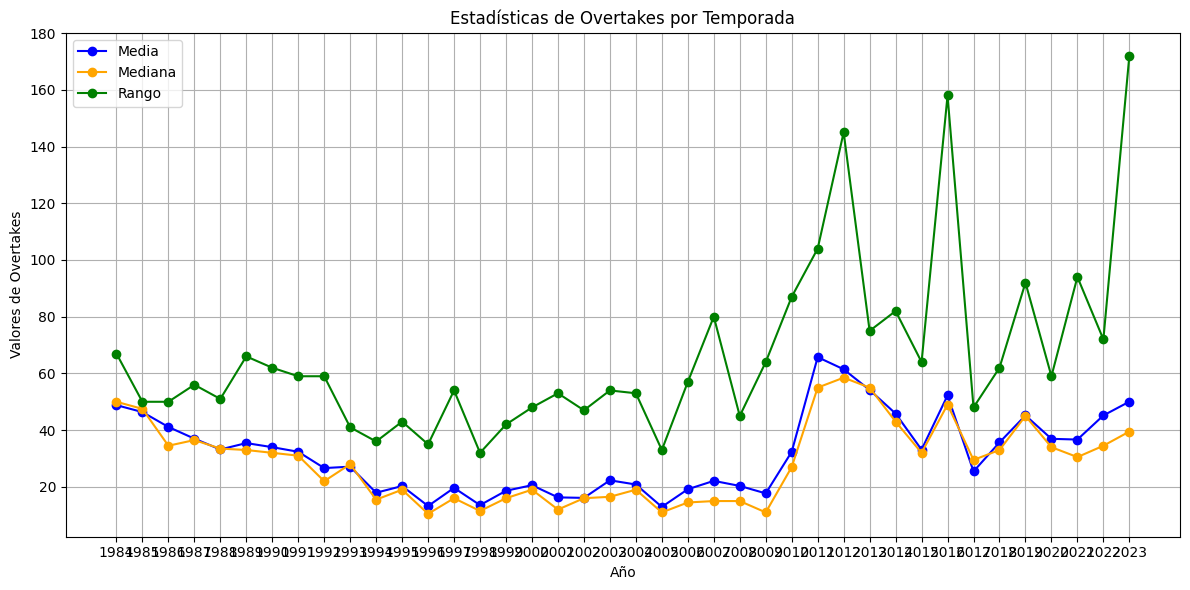

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(stats['Season'], stats['Media'], marker='o', label='Media', color='blue')
plt.plot(stats['Season'], stats['Mediana'], marker='o', label='Mediana', color='orange')
plt.plot(stats['Season'], stats['Rango'], marker='o', label='Rango', color='green')


plt.title('Estadísticas de Overtakes por Temporada')
plt.xlabel('Año')
plt.ylabel('Valores de Overtakes')
plt.xticks(stats['Season'])  
plt.legend()
plt.grid()


plt.tight_layout()
plt.show()

In [17]:
stats['Diferencia_Rango_Media'] = stats['Rango'] - stats['Media']
stats["Diferencia_Mediana_media"] = stats["Mediana"]-stats["Media"]
stats["Diferencia_Rango_Mediana"] = stats['Rango'] - stats['Mediana']
stats.head(3)

,Season,Rango,Media,Mediana,Diferencia_Rango_Media,Diferencia_Mediana_media,Diferencia_Rango_Mediana
0,1984,67,48.812500,50.0,18.187500,1.187500,17.0
1,1985,50,46.375000,47.5,3.625000,1.125000,2.5
2,1986,50,41.125000,34.5,8.875000,-6.625000,15.5
3,1987,56,37.000000,36.5,19.000000,-0.500000,19.5
4,1988,51,33.187500,33.5,17.812500,0.312500,17.5
5,1989,66,35.437500,33.0,30.562500,-2.437500,33.0
6,1990,62,34.000000,32.0,28.000000,-2.000000,30.0
7,1991,59,32.375000,31.0,26.625000,-1.375000,28.0
8,1992,59,26.625000,22.0,32.375000,-4.625000,37.0
9,1993,41,27.125000,28.0,13.875000,0.875000,13.0


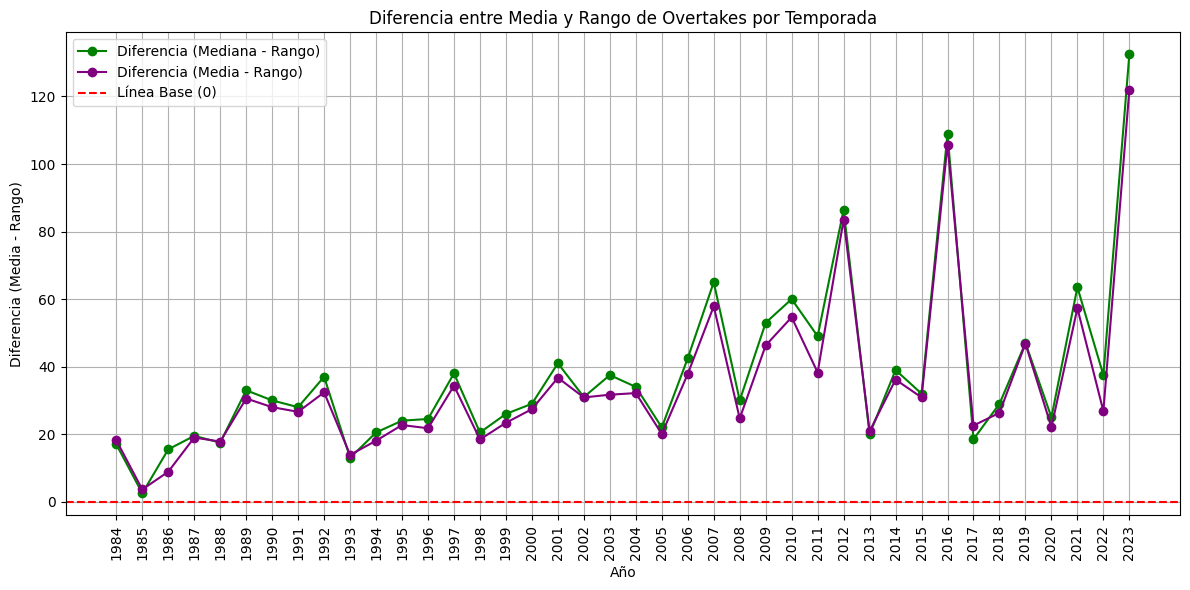

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(stats['Season'], stats['Diferencia_Rango_Mediana'], marker='o', label='Diferencia (Mediana - Rango)', color='green')
plt.plot(stats['Season'], stats['Diferencia_Rango_Media'], marker='o', label='Diferencia (Media - Rango)', color='purple')


plt.title('Diferencia entre Media y Rango de Overtakes por Temporada')
plt.xlabel('Año')
plt.ylabel('Diferencia (Media - Rango)')
plt.xticks(stats['Season'], rotation=90)  # Asegurarse de que todos los años se muestren en el eje x
plt.axhline(0, color='red', linestyle='--', label='Línea Base (0)')  # Línea horizontal en 0 para referencia
plt.legend()
plt.grid()


plt.tight_layout()
plt.show()

## 2.3 - % adelantamientos televisados por temporada

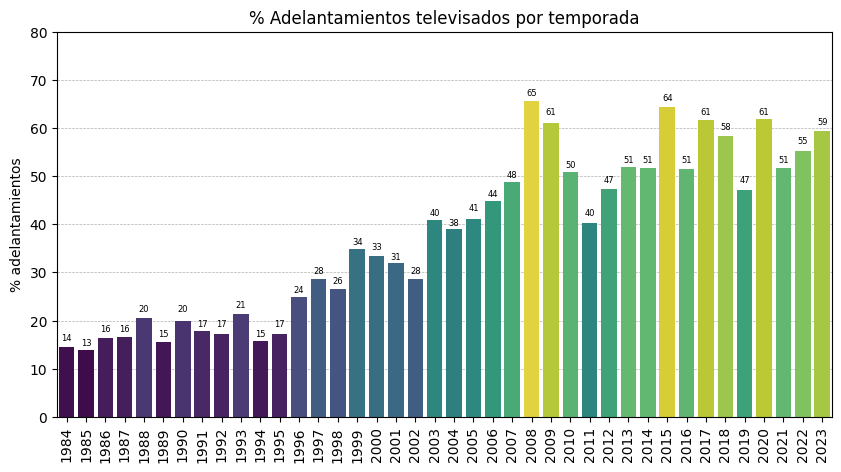

In [19]:
fig, axs = plt.subplots(nrows=1,ncols=1,figsize=(10,5))

axes = sns.barplot(df_overtakes_average, x="Season", y="Percent on TV",hue="Percent on TV", legend=False, palette="viridis",ax=axs)
axs.tick_params(axis="x", labelrotation=90)
axs.set_ylabel("% adelantamientos")
axs.set_ylim(0,80)
plt.yticks(range (0,90,10))
plt.grid(axis="y", linestyle = "dashed", linewidth = 0.5)
axs.set_axisbelow(True)
axs.set_title("% Adelantamientos televisados por temporada")
axs.set_xlabel("");

for p in axs.patches:
    height = int(p.get_height())
    #if height > 10:  # Solo mostrar si el valor es mayor a 10
    axs.annotate(height, (p.get_x() + p.get_width() / 2., height), 
                     ha='center', va='center', xytext=(0, 8), textcoords='offset points', fontsize= 6)
    
plt.savefig("./img/2_Overtakes/Over_3.png") 

## 2.4 - Análisis separado por temporada

### 2.4.1 - Gran Premio con mas adelantamientos por temporada

In [20]:
filtro_max_overtakes = df_overtakes.groupby("Season")["Overtakes"].idxmax()
df_max_overtakes = df_overtakes.loc[filtro_max_overtakes].reset_index(drop=True)

In [21]:
df_max_overtakes.head(3)

,Season,Race,Overtakes,TV,Percentage,GP_num
0,1984,South Africa,83,15,18.07,2
1,1985,Belgium,65,6,9.23,13
2,1986,Germany,65,6,9.23,10


In [22]:
df_sorted = df_max_overtakes.sort_values(by=['Season', 'Overtakes'], ascending=[True, False])

df_top_3_overtakes = df_sorted.groupby('Season').head(1)

df_top_3_overtakes.Race.value_counts()

Race
Germany          6
Great Britain    4
Belgium          4
China            4
Brazil           3
USA              2
Portugal         2
Europe           2
Malaysia         2
Russia           1
Azerbaijan       1
Turkey           1
Italy            1
South Africa     1
Australia        1
Spain            1
Mexico           1
Japan            1
Austria          1
Netherlands      1
Name: count, dtype: int64

In [23]:
df_max_overtakes.Race.value_counts()

Race
Germany          6
Great Britain    4
Belgium          4
China            4
Brazil           3
USA              2
Portugal         2
Europe           2
Malaysia         2
Russia           1
Azerbaijan       1
Turkey           1
Italy            1
South Africa     1
Australia        1
Spain            1
Mexico           1
Japan            1
Austria          1
Netherlands      1
Name: count, dtype: int64

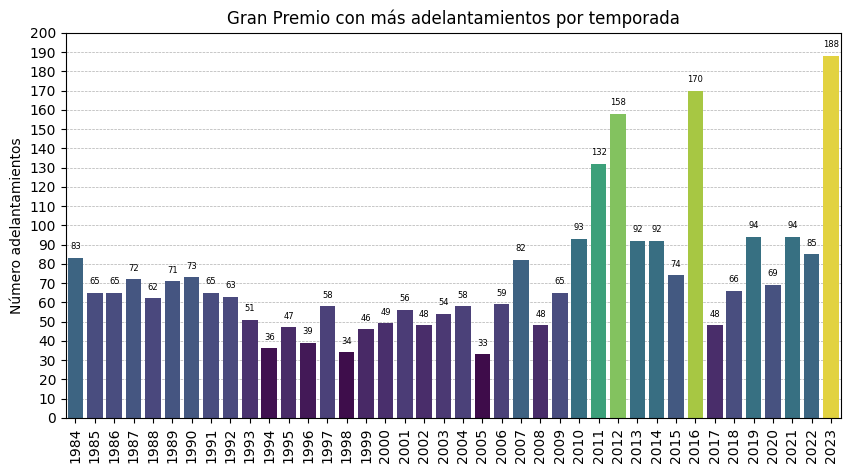

In [24]:
fig, axs = plt.subplots(nrows=1,ncols=1,figsize=(10,5))

sns.barplot(df_max_overtakes, x="Season", y="Overtakes",hue="Overtakes", legend=False, palette="viridis",ax=axs)
axs.tick_params(axis="x", labelrotation=90)
axs.set_ylabel("Número adelantamientos")
axs.set_ylim(0,200)
plt.yticks(range (0,210,10))
plt.grid(axis="y", linestyle = "dashed", linewidth = 0.5)
axs.set_axisbelow(True)
axs.set_title("Gran Premio con más adelantamientos por temporada")
axs.set_xlabel("");

for p in axs.patches:
    height = int(p.get_height())
    #if height > 10:  # Solo mostrar si el valor es mayor a 10
    axs.annotate(height, (p.get_x() + p.get_width() / 2., height), 
                     ha='center', va='center', xytext=(0, 8), textcoords='offset points', fontsize= 6)
    
plt.savefig("./img/2_Overtakes/Over_4.png") 

### 2.4.2 - Gran Premio con menos adelantamientos por temporada

In [25]:
filtro_min_overtakes = df_overtakes.groupby("Season")["Overtakes"].idxmin()
df_min_overtakes = df_overtakes.loc[filtro_min_overtakes].reset_index(drop=True)

In [26]:
df_min_overtakes.head(3)

,Season,Race,Overtakes,TV,Percentage,GP_num
0,1984,Great Britain,16,0,0.00,10
1,1985,South Africa,15,9,60.00,15
2,1986,Austria,15,1,6.67,12


In [27]:
df_min_overtakes.Race.value_counts()

Race
Monaco            17
Hungary            5
San Marino         4
South Africa       2
Japan              2
Australia          2
Great Britain      1
Austria            1
France             1
USA                1
Spain              1
Europe             1
Russia             1
Emilia-Romagna     1
Name: count, dtype: int64

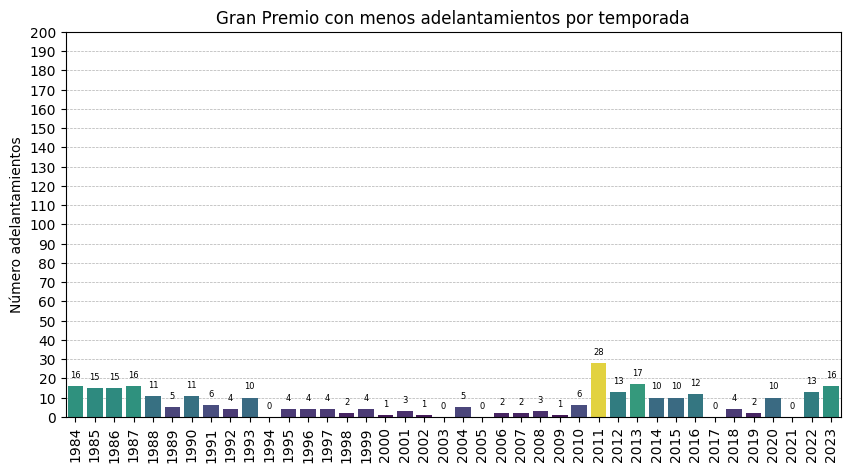

In [28]:
fig, axs = plt.subplots(nrows=1,ncols=1,figsize=(10,5))

sns.barplot(df_min_overtakes, x="Season", y="Overtakes",hue="Overtakes", legend=False, palette="viridis",ax=axs)
axs.tick_params(axis="x", labelrotation=90)
axs.set_ylabel("Número adelantamientos")
axs.set_ylim(0,200)
plt.yticks(range (0,210,10))
plt.grid(axis="y", linestyle = "dashed", linewidth = 0.5)
axs.set_axisbelow(True)
axs.set_title("Gran Premio con menos adelantamientos por temporada")
axs.set_xlabel("");

for p in axs.patches:
    height = int(p.get_height())
    #if height > 10:  # Solo mostrar si el valor es mayor a 10
    axs.annotate(height, (p.get_x() + p.get_width() / 2., height), 
                     ha='center', va='center', xytext=(0, 8), textcoords='offset points', fontsize= 6)
    
plt.savefig("./img/2_Overtakes/Over_5.png") 

# 2.5 Diferentes gráficos sobre adelantamientos

### 2.5.1 IMPORTANTE: Gráfico de dispersión con regresión cúbica e intervalo de confianza

Ancho del intervalo: Indica la incertidumbre; bandas más anchas significan mayor incertidumbre.

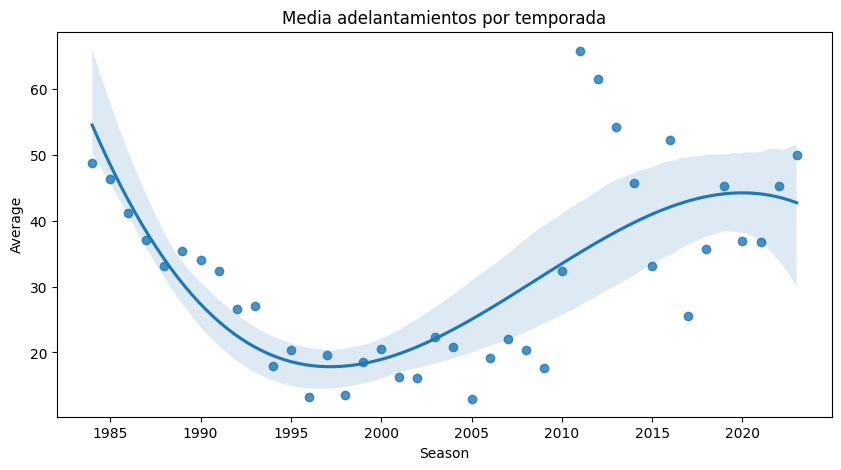

In [29]:
plt.figure(figsize=(10, 5))
sns.regplot(df_overtakes_average,x="Season",y="Average", order=3)
plt.title('Media adelantamientos por temporada')
plt.savefig("./img/2_Overtakes/Over_dispersion_1.png") 

# 2.5.2 Gráfico lineal con la evolución temporal de los adelantamientos

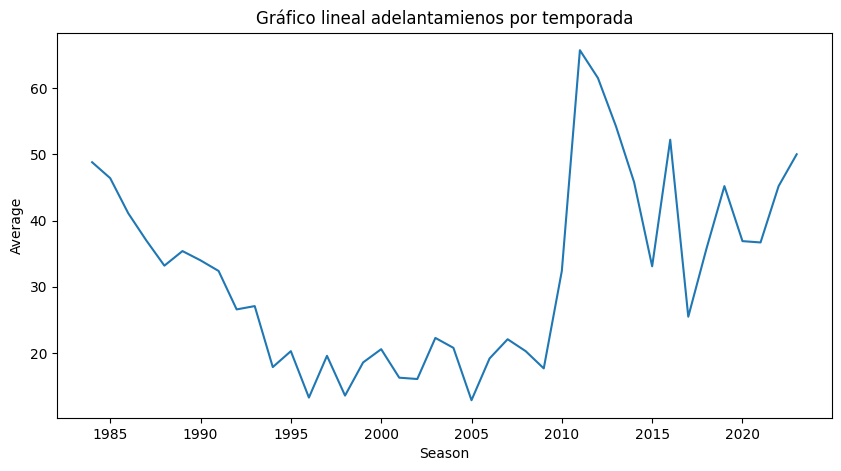

In [30]:
plt.figure(figsize=(10, 5))
sns.lineplot(df_overtakes_average, x="Season", y="Average")
plt.title('Gráfico lineal adelantamienos por temporada')
plt.savefig("./img/2_Overtakes/Over_6.png") 

# % Abandono y Media Adelantamienos - - Análisis gráfico y estadístico

In [31]:
df_overtakes_average.head(3)

,Season,Overtakes,Overtakes on TV,No. of Races,Average,Average on TV,Median,Median on TV,Percent on TV
0,1984,781,113,16,48.8,7.1,50.0,5.5,14.549180
1,1985,742,102,16,46.4,6.4,48.0,6.0,13.793103
2,1986,658,107,16,41.1,6.7,35.0,6.0,16.301703


In [32]:
df_percent_DNF = pd.read_csv("./data/df_percent_DNF.csv") 

In [33]:
df_percent_DNF.rename(columns={"year":"Season"}, inplace=True)
df_percent_DNF.head(3)

,Season,ratio_DNF
0,1984,155.95
1,1985,120.65
2,1986,132.77


In [34]:
df_overtakes_DNF_relation = pd.merge(df_overtakes_average,df_percent_DNF, on= "Season", how="left")

In [35]:
df_overtakes_DNF_relation.head(40)

,Season,Overtakes,Overtakes on TV,No. of Races,Average,Average on TV,Median,Median on TV,Percent on TV,ratio_DNF
0,1984,781,113,16,48.8,7.1,50.0,5.5,14.549180,155.95
1,1985,742,102,16,46.4,6.4,48.0,6.0,13.793103,120.65
2,1986,658,107,16,41.1,6.7,35.0,6.0,16.301703,132.77
3,1987,592,97,16,37.0,6.1,37.0,5.0,16.486486,118.23
4,1988,531,108,16,33.2,6.8,34.0,6.5,20.481928,122.97
5,1989,567,88,16,35.4,5.5,33.0,5.0,15.536723,221.24
6,1990,544,109,16,34.0,6.8,32.0,6.0,20.000000,147.49
7,1991,518,92,16,32.4,5.8,31.0,6.5,17.901235,141.70
8,1992,426,73,16,26.6,4.6,22.0,2.0,17.293233,123.36
9,1993,434,92,16,27.1,5.8,28.0,6.0,21.402214,88.99


# Analisis por media adelantamientos

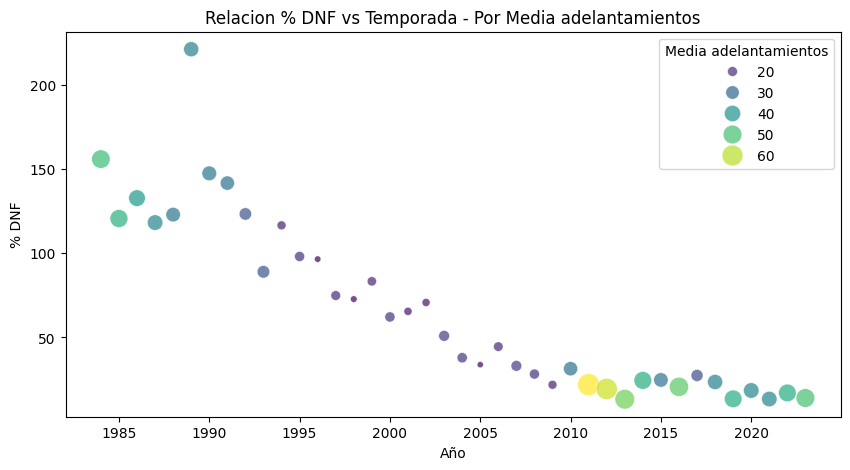

In [36]:
plt.figure(figsize=(10, 5))
sns.scatterplot(df_overtakes_DNF_relation,x="Season",y="ratio_DNF", size ="Average", sizes = (20, 250), alpha = 0.7, hue="Average", palette="viridis")
plt.xlabel("Año")
plt.ylabel ("% DNF")
plt.title("Relacion % DNF vs Temporada - Por Media adelantamientos")
plt.legend(title="Media adelantamientos")
plt.savefig("./img/2_Overtakes/Over_Tri_1.png") 

In [37]:
from scipy.stats import pearsonr

In [38]:
# Si que hay una relacion estadistica entre el & de abandonos y el año. Conforme avanza temporalmente las temporadas, disminuyen los abandonos.

corr, p_value = pearsonr(df_overtakes_DNF_relation['ratio_DNF'], df_overtakes_DNF_relation['Season'])
print(f"Coeficiente de correlación: {corr}, Valor p: {p_value}")

Coeficiente de correlación: -0.901165743941513, Valor p: 2.272636985071103e-15


# IMPORTANTE: Análisis por % abandonos

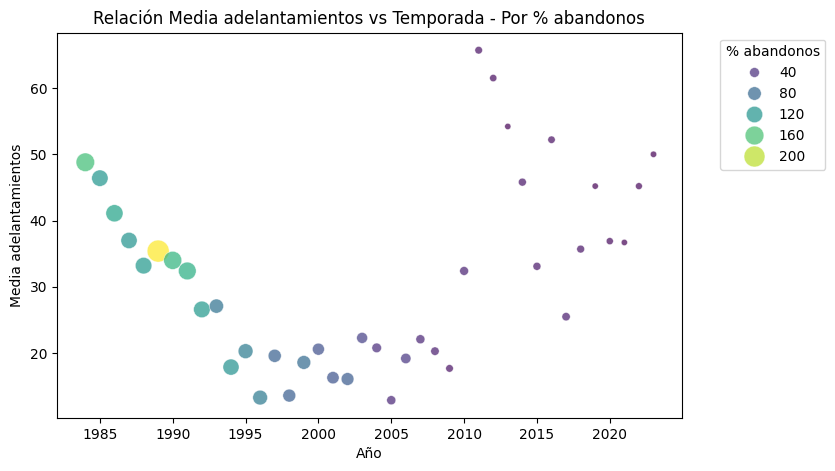

In [39]:
plt.figure(figsize=(10, 5))
sns.scatterplot(df_overtakes_DNF_relation,x="Season",y="Average", size ="ratio_DNF", sizes = (20, 250), alpha = 0.7, hue="ratio_DNF", palette="viridis")
plt.subplots_adjust(right=0.75)
plt.xlabel("Año")
plt.ylabel ("Media adelantamientos")
plt.title("Relación Media adelantamientos vs Temporada - Por % abandonos")
plt.legend(title="% abandonos",bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("./img/2_Overtakes/Over_Tri_2.png") 

In [40]:
# El valor es cercano a 0,05 pero no lo suficiente, no presenta relacion estadistica el avance temporal y los adelantamientos

corr, p_value = pearsonr(df_overtakes_DNF_relation['Average'], df_overtakes_DNF_relation['Season'])
print(f"Coeficiente de correlación: {corr}, Valor p: {p_value}")

Coeficiente de correlación: 0.26904411947288936, Valor p: 0.09320268134315272


# Analisis por temporada

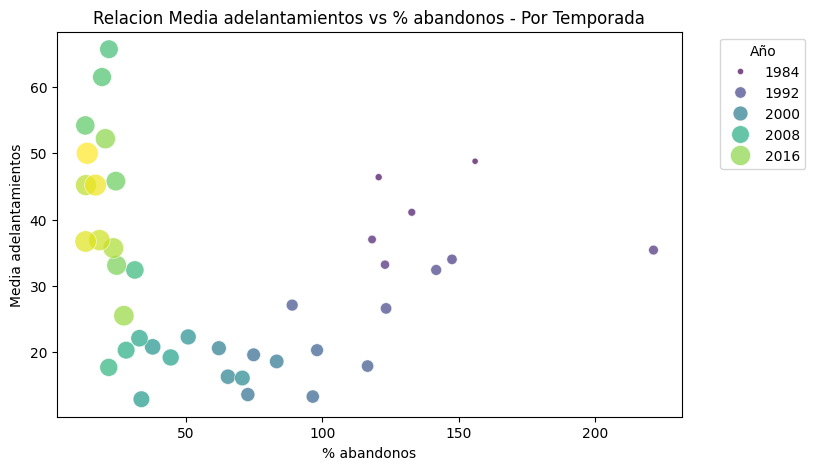

In [41]:
plt.figure(figsize=(10, 5))
sns.scatterplot(df_overtakes_DNF_relation,x="ratio_DNF",y="Average", size ="Season", sizes = (20, 250), alpha = 0.7, hue="Season", palette="viridis")
plt.subplots_adjust(right=0.75)
plt.xlabel("% abandonos")
plt.ylabel ("Media adelantamientos")
plt.title("Relacion Media adelantamientos vs % abandonos - Por Temporada")
plt.legend(title="Año",bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("./img/2_Overtakes/Over_Tri_3.png") 

In [42]:
# No hay relacion estadistica entre la media de adelantamientos con el % de abandonos.

corr, p_value = pearsonr(df_overtakes_DNF_relation['Average'], df_overtakes_DNF_relation['ratio_DNF'])
print(f"Coeficiente de correlación: {corr}, Valor p: {p_value}")

Coeficiente de correlación: -0.14536166736537515, Valor p: 0.3708074036471338


In [46]:
df_overtakes_DNF_relation

,Season,Overtakes,Overtakes on TV,No. of Races,Average,Average on TV,Median,Median on TV,Percent on TV,ratio_DNF
0,1984,781,113,16,48.8,7.1,50.0,5.5,14.549180,155.95
1,1985,742,102,16,46.4,6.4,48.0,6.0,13.793103,120.65
2,1986,658,107,16,41.1,6.7,35.0,6.0,16.301703,132.77
3,1987,592,97,16,37.0,6.1,37.0,5.0,16.486486,118.23
4,1988,531,108,16,33.2,6.8,34.0,6.5,20.481928,122.97
5,1989,567,88,16,35.4,5.5,33.0,5.0,15.536723,221.24
6,1990,544,109,16,34.0,6.8,32.0,6.0,20.000000,147.49
7,1991,518,92,16,32.4,5.8,31.0,6.5,17.901235,141.70
8,1992,426,73,16,26.6,4.6,22.0,2.0,17.293233,123.36
9,1993,434,92,16,27.1,5.8,28.0,6.0,21.402214,88.99


In [45]:
df_overtakes_DNF_relation.to_csv("./data/overtakes_DNF_relation.csv", sep=",", index =False)